In [1]:
import cv2
import imutils
from imutils.perspective import four_point_transform
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load

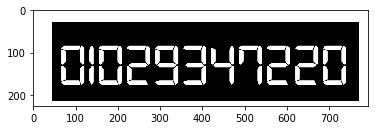

In [5]:
image = cv2.imread('./스크린샷 2019-10-26 오전 1.16.55.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

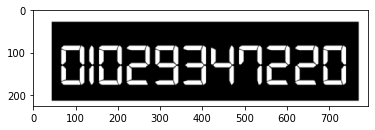

In [6]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

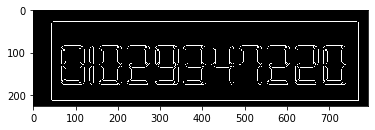

In [7]:
edged = cv2.Canny(blurred, 50, 200, 255)

plt.imshow(edged, cmap = 'gray')
plt.show()

## 추출

In [12]:
# find contours in the edge map, then sort them by their
# size in descending order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
print(cnts)
displayCnt = None



[array([[[ 47,  27]],

       [[ 46,  28]],

       [[ 44,  28]],

       [[ 44,  30]],

       [[ 43,  31]],

       [[ 43, 210]],

       [[ 44, 211]],

       [[ 44, 213]],

       [[769, 213]],

       [[769,  28]],

       [[767,  28]],

       [[766,  27]]], dtype=int32)]


In [13]:
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4:
        displayCnt = approx
        break

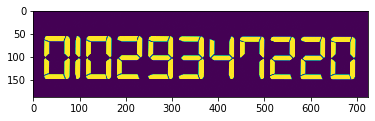

In [14]:
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

plt.imshow(warped)

## Thresholding

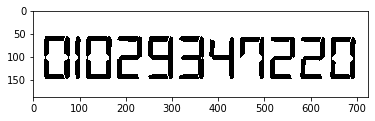

In [15]:
thresh = cv2.threshold(warped, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.imshow(thresh, cmap='gray')

In [21]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

print(cnts)
digitCnts = []
 
# loop over the digit area candidates
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
 
	# if the contour is sufficiently large, it must be a digit
	if w >= 15 and (h >= 30 and h <= 40):
		digitCnts.append(c)
        
print(digitCnts)

[array([[[  1,   0]],

       [[  1,  95]],

       [[  0,  96]],

       [[  0, 185]],

       [[724, 185]],

       [[724,   1]],

       [[633,   1]],

       [[632,   0]]], dtype=int32)]
[]


In [19]:
digitCnts = contours.sort_contours(digitCnts,
	method="left-to-right")[0]
digits = []

ValueError: not enough values to unpack (expected 2, got 0)